<a href="https://colab.research.google.com/github/SebastianLealT/OPTIMIZACION-1/blob/main/Optimizaci%C3%B3n_con_restricciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema de optimización con restricciones
###Johan Sebastian Leal
###Curso de Optimización I
###Universidad del valle, Cali

En este cuaderno nos centraremos en resolver dos casos de optimización con restricciones no lineales para una misma función objetivo. La función escogida es conocida como *Booth Function* que estará definida en la primera sección de este documento.

Para la realización de este proyecto será necesario importar los siguientes paquetes:

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

##Función a evaluar y algunos otros cálculos

Definimos nuestra función objetivo, en este caso será:

$$f(x,y)=(x+2y-7)^{2}+(2x+y-5)^{2}$$

la cual es conocida como *Booth Function*. Incluimos desde aquí la siguiente restricción de cotas:

$$ -10 \leq x \leq 10 $$
$$ -10 \leq y \leq 10$$

In [103]:
def booth(x):
  return ((x[0] + (2*x[1]) -7)**2) + (((2*x[0]) + x[1] - 5)**2)

#cotas
cotas = optimize.Bounds([-10, -10], [10,10])

Habiendo definido la función objetivo, será necesario conocer el Jacobiano y la Hessiana de la función en cuestión, para ello realizamos algunos cálculos manuales y definimos cada una de estas operaciones como se muestra:

1. Jacobiano de $f(x,y)$:
$$J(x,y)=\begin{bmatrix} 2(x+2y-7)+4(2x+y-5)\\ 4(x+2y-7)+2(2x+y-5)\end{bmatrix}$$

2. Hessiana de $f(x,y)$:
$$H(x,y)=\begin{bmatrix} 10& 8\\ 8& 10\end{bmatrix}$$

In [104]:
#Se define el jacobiano
def Jf(x):
  der = np.zeros_like(x)
  der[0]= (2*(x[0] + (2*x[1]) -7)) + (4*((2*x[0]) + x[1] - 5))
  der[1]= (4*(x[0] + (2*x[1]) -7)) + (2*((2*x[0]) + x[1] - 5))
  return der

#Se define la Hessiana
def Hf(x):
  x = np.asarray(x)
  H = np.diag([10 , 10 ])
  H[1,0]= 8
  H[0,1]= 8
  return H

Definimos la malla y graficamos las curvas de nivel de nuestra función:

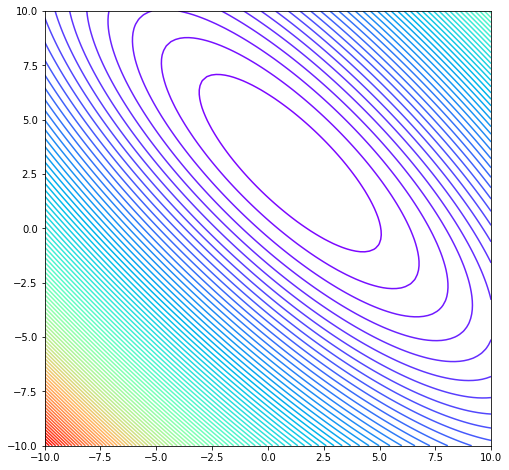

In [105]:
#Se establecen las cotas para los ejes x e y respectivamente
x_min, x_max = -10, 10
y_min, y_max = -10, 10

#Partición para el eje x con 100 puntos
xx = np.linspace(x_min,x_max,100)
#Partición para el eje y con 100 puntos
yy = np.linspace(y_min,y_max,100)

#Creamos la malla de pares (x,y) que me cubre todos los puntos sobre el dominio definido
X, Y = np.meshgrid(xx, yy)

#Se crea la lista de puntos resultantes al evaluar la función
Z = booth([X, Y])

#Creamos la imagen y mostramos la gráfica
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow")
plt.show()

##Problema de optimización \#1

Minimice la función $f(x,y)$ sujeto a las siguientes restricciones:

Restricciones lineales:
$$\frac{1}{2}x+y \leq 1$$
$$ 2x+y= 1 $$

Restricciones no lineales:
$$\frac{1}{2}x^2 + \frac{1}{2}y \leq 1$$
$$x^2 - y \leq 1 $$

###Restricciones lineales

Representamos las restricciones lineales dadas en un arreglo matricial de la siguiente forma:

$$\left[ \array{- \infty \\ 1 } \right] \leq \left[ \array{ \frac{1}{2} & 1 \\ 2 & 1 } \right] \left[ \array{x \\ y } \right] \leq \left[ \array{1 \\ 1 } \right] $$

Se define el código del anterior arreglo de restricciones de la siguiente manera usando el comando optimize:

In [97]:
Rlineal1 = optimize.LinearConstraint([[1/2,1],[2,1]],[-np.inf,1],[1,1])

###Restricciones no lineales

Representamos las restricciones no lineales dadas en un arreglo matricial definiendo una función $C$ de la siguiente manera:

$$C(x,y)= \left[ \array{\frac{1}{2}x^2 + \frac{1}{2}y \\ x^2 - y } \right]$$

$$\left[\array{-\infty \\ -\infty } \right] \leq C(x,y) \leq \left[ \array{1 \\ 1 } \right]$$

Definimos el código de la función $C$:

In [98]:
def C(X):
  return [(1/2)*X[0]**2 + (1/2)*X[1] , X[0]**2 - X[1]]

Haciendo uso del comando optimize se define el código para las restricciones no lineales:

In [106]:
Rnolineal1= optimize.NonlinearConstraint(C,[-np.inf,-np.inf],[1,1]) 

###Optimización del problema

Elegimos un punto $x_{0}$ para dar inicio al método de optimización y definimos las listas de los puntos $x$, $y$ y $f(x,y)$ que se guardaran con la función *store* para cada iteración:

In [123]:
x0=[-7,-6]
liX=[x0[0]]
liY=[x0[1]]
liF=[booth(x0)]

def store1(X, V):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(booth(X))

Finalmente aplicamos el comando optimize para resolver el problema dado, de todos los resultados de este comando nos centraremos en el número de iteraciones (niter) y el óptimo encontrado (x):

In [124]:
res = optimize.minimize(booth, x0, callback= store1, method='trust-constr', jac= Jf, hess= Hf, constraints=[Rlineal1, Rnolineal1] , bounds= cotas)
print('Número de iteraciones realizadas: ', res.niter)
print('Óptimo encontrado: ', res.x)

Número de iteraciones realizadas:  21
Óptimo encontrado:  [1.33511060e-04 9.99732978e-01]


El recorrido que siguió el programa con cada iteración puede verse en el siguiente gráfico, junto con las fronteras de cada restricción:


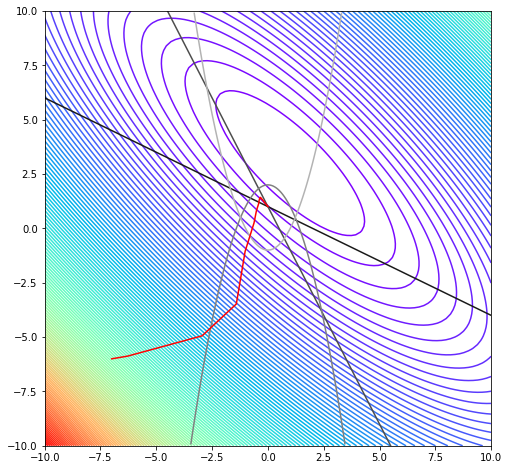

In [148]:
#Graficamos nuevamente las curvas de nivel de la función
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow")

#Graficamos el contorno de cada restricción
w = np.linspace(-10, 10, 100)
plt.plot(w, (2-w)/2, color='0.1')

s = np.linspace(-4.5, 5.5, 100)
plt.plot(s, 1-2*s, color='0.3')

p = np.linspace(-3.45, 3.45, 100)
plt.plot(p, 2-p**2, color='0.5')

q = np.linspace(-3.3, 3.3, 100)
plt.plot(q, (q**2)-1, color='0.7')

#Se raliza la gráfica de los puntos guardados por la función store1 para  x e y
plt.plot(liX,liY, color='red')

plt.show()

##Problema de optimización \#2

Minimice la función $f(x,y)$ sujeto a las siguientes restricciones:

Restricciones lineales:
$$x+y \leq 2$$
$$ -2x-y \leq 7 $$

Restricciones no lineales:
$$6sin\left(\frac{x}{2}\right) - y \leq -3$$
$$-x^3 + 6y \leq 24 $$

###Restricciones lineales

Representamos las restricciones lineales dadas en un arreglo matricial de la siguiente forma:

$$\left[ \array{- \infty \\ -\infty } \right] \leq \left[ \array{ 1 & 1 \\ -2 & -1 } \right] \left[ \array{x \\ y } \right] \leq \left[ \array{2 \\ 7 } \right] $$

Se define el código del anterior arreglo de restricciones de la siguiente manera usando el comando optimize:

In [149]:
Rlineal2 = optimize.LinearConstraint([[1,1],[-2,-1]],[-np.inf,-np.inf],[2,7])

###Restricciones no lineales

Representamos las restricciones no lineales dadas en un arreglo matricial definiendo una función $C$ de la siguiente manera:

$$K(x,y)= \left[ \array{6sin\left(\frac{x}{2}\right) - y \leq -3 \\ -x^{3}+6y } \right]$$

$$\left[\array{-\infty \\ -\infty } \right] \leq K(x,y) \leq \left[ \array{-3 \\ 24 } \right]$$

Definimos el código de la función $K$:

In [150]:
def K(X):
  return [6*np.sin(X[0]/2) - X[1] , -X[0]**3 + 6*X[1]]

Haciendo uso del comando optimize se define el código para las restricciones no lineales:

In [151]:
Rnolineal2= optimize.NonlinearConstraint(K,[-np.inf,-np.inf],[-3,24]) 

###Optimización del problema

Elegimos un punto $x_{1}$ para dar inicio al método de optimización y definimos las listas de los puntos $x$, $y$ y $f(x,y)$ que se guardaran con la función *store* para cada iteración:

In [153]:
x1=[-7,-6]
lisX=[x1[0]]
lisY=[x1[1]]
lisF=[booth(x1)]

def store2(X, V):
    global lisX
    global lisY
    global lisF
    x, y = X
    lisX.append(x)
    lisY.append(y)
    lisF.append(booth(X))

Finalmente aplicamos el comando optimize para resolver el problema dado, de todos los resultados de este comando nos centraremos en el número de iteraciones (niter) y el óptimo encontrado (x):

In [154]:
res = optimize.minimize(booth, x1, callback= store2, method='trust-constr', jac= Jf, hess= Hf, constraints=[Rlineal2, Rnolineal2] , bounds= cotas)
print('Número de iteraciones realizadas: ', res.niter)
print('Óptimo encontrado: ', res.x)

Número de iteraciones realizadas:  18
Óptimo encontrado:  [-0.25059439  2.2505745 ]


El recorrido que siguió el programa con cada iteración puede verse en el siguiente gráfico, junto con las fronteras de cada restricción:

In [ ]:
#Graficamos nuevamente las curvas de nivel de la función
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow")

#Graficamos el contorno de cada restricción
w = np.linspace(-10, 10, 100)
plt.plot(w, (2-w)/2, color='0.1')

s = np.linspace(-4.5, 5.5, 100)
plt.plot(s, 1-2*s, color='0.3')

p = np.linspace(-3.45, 3.45, 100)
plt.plot(p, 2-p**2, color='0.5')

q = np.linspace(-3.3, 3.3, 100)
plt.plot(q, (q**2)-1, color='0.7')

#Se raliza la gráfica de los puntos guardados por la función store1 para  x e y
plt.plot(liX,liY, color='red')

plt.show()

##Conclusiones

##Referencias

1. Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.
2. Chong, E. K., & Zak, S. H. (2004). An introduction to optimization. John Wiley & Sons.